<a href="https://colab.research.google.com/github/bharathbolla/Click-Through-Rate-Prediction/blob/main/CTR_Prediction_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [219]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [220]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


In [221]:
df  = pd.read_csv("data.csv")

In [222]:
df.head()

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
0,False,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,962c8333,be6db1d7,1,0,22683,320,50,2528,0,39,100075,221,10,1,28,14,0
1,True,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,5b1f94b9,1b13b020,1,0,17037,320,50,1934,2,39,-1,16,10,2,22,19,1
2,False,1005,0,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,a9a84f4c,9a45a8e8,1,0,22155,320,50,2552,3,167,100202,23,10,3,23,18,0
3,False,1002,0,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,0fa578fd,88c62dad,ea6abc60,0,0,21591,320,50,2478,3,167,100074,23,10,2,22,19,0
4,True,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,1e5e0d0e,36d749e5,1,0,15708,320,50,1722,0,35,-1,79,10,1,21,8,1


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   click             99999 non-null  bool  
 1   C1                99999 non-null  int64 
 2   banner_pos        99999 non-null  int64 
 3   site_id           99999 non-null  object
 4   site_domain       99999 non-null  object
 5   site_category     99999 non-null  object
 6   app_id            99999 non-null  object
 7   app_domain        99999 non-null  object
 8   app_category      99999 non-null  object
 9   device_id         99999 non-null  object
 10  device_ip         99999 non-null  object
 11  device_model      99999 non-null  object
 12  device_type       99999 non-null  int64 
 13  device_conn_type  99999 non-null  int64 
 14  C14               99999 non-null  int64 
 15  C15               99999 non-null  int64 
 16  C16               99999 non-null  int64 
 17  C17         

In [224]:
df.describe()

,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
count,99999.000000,99999.000000,99999.00000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.0,99999.000000,99999.000000,99999.000000,99999.000000
mean,1004.967550,0.289943,1.01639,0.329453,18857.231732,318.834548,60.278743,2114.613036,1.439904,227.234932,53292.001950,83.163542,10.0,2.592836,25.485755,11.300673,0.169802
std,1.091916,0.505707,0.53110,0.854673,4944.919482,21.510752,47.713436,607.469442,1.326824,351.472366,49952.340367,70.161076,0.0,1.723003,2.968520,5.938725,0.375460
min,1001.000000,0.000000,0.00000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,1.000000,10.0,0.000000,21.000000,0.000000,0.000000
25%,1005.000000,0.000000,1.00000,0.000000,16920.000000,320.000000,50.000000,1863.000000,0.000000,35.000000,-1.000000,23.000000,10.0,1.000000,23.000000,7.000000,0.000000
50%,1005.000000,0.000000,1.00000,0.000000,20346.000000,320.000000,50.000000,2323.000000,2.000000,39.000000,100050.000000,61.000000,10.0,2.000000,26.000000,11.000000,0.000000
75%,1005.000000,1.000000,1.00000,0.000000,21893.000000,320.000000,50.000000,2526.000000,3.000000,171.000000,100093.000000,101.000000,10.0,4.000000,28.000000,16.000000,0.000000
max,1012.000000,7.000000,5.00000,5.000000,24043.000000,1024.000000,1024.000000,2757.000000,3.000000,1839.000000,100248.000000,255.000000,10.0,6.000000,30.000000,23.000000,1.000000


In [225]:
df.describe(include="all")

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
count,99999,99999.000000,99999.000000,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999.00000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.0,99999.000000,99999.000000,99999.000000,99999.000000
unique,2,NaN,NaN,1485,1331,19,1354,96,21,16801,78013,3145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,False,NaN,NaN,85f751fd,c4e18dd6,50e219e0,ecad2386,7801e8d9,07d7df22,a99f214a,6b9769f2,8a4875bd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,83019,NaN,NaN,36022,37362,40839,63977,67464,64769,82579,521,6041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1004.967550,0.289943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.01639,0.329453,18857.231732,318.834548,60.278743,2114.613036,1.439904,227.234932,53292.001950,83.163542,10.0,2.592836,25.485755,11.300673,0.169802
std,NaN,1.091916,0.505707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.53110,0.854673,4944.919482,21.510752,47.713436,607.469442,1.326824,351.472366,49952.340367,70.161076,0.0,1.723003,2.968520,5.938725,0.375460
min,NaN,1001.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,1.000000,10.0,0.000000,21.000000,0.000000,0.000000
25%,NaN,1005.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,0.000000,16920.000000,320.000000,50.000000,1863.000000,0.000000,35.000000,-1.000000,23.000000,10.0,1.000000,23.000000,7.000000,0.000000
50%,NaN,1005.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,0.000000,20346.000000,320.000000,50.000000,2323.000000,2.000000,39.000000,100050.000000,61.000000,10.0,2.000000,26.000000,11.000000,0.000000
75%,NaN,1005.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,0.000000,21893.000000,320.000000,50.000000,2526.000000,3.000000,171.000000,100093.000000,101.000000,10.0,4.000000,28.000000,16.000000,0.000000


### Changing Data Types
####  "banner_pos",  and "C1", "device_type", "device_conn_type", "C14 - C21", "month", "day of week", "day", hour" are categorical variables

In [226]:
convert_cols_list = ["banner_pos", "C1", "device_type", "device_conn_type", "C14", "C15", "C16", "C17", "C18", "C19", "C20", "C21", "month", "dayofweek", "day", "hour"]

In [227]:
def convert_datatype(col_list, data):
  for col in col_list:
    data[col] = data[col].astype('category')
  return data



In [228]:
df_new = convert_datatype(convert_cols_list, df)
df_new.dtypes

click               bool    
C1                  category
banner_pos          category
site_id             object  
site_domain         object  
site_category       object  
app_id              object  
app_domain          object  
app_category        object  
device_id           object  
device_ip           object  
device_model        object  
device_type         category
device_conn_type    category
C14                 category
C15                 category
C16                 category
C17                 category
C18                 category
C19                 category
C20                 category
C21                 category
month               category
dayofweek           category
day                 category
hour                category
y                   int64   
dtype: object

In [229]:
df_new.describe(include = 'all')

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
count,99999,99999.0,99999.0,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.000000
unique,2,7.0,7.0,1485,1331,19,1354,96,21,16801,78013,3145,4.0,4.0,1722.0,8.0,9.0,399.0,4.0,64.0,154.0,60.0,1.0,7.0,10.0,24.0,NaN
top,False,1005.0,0.0,85f751fd,c4e18dd6,50e219e0,ecad2386,7801e8d9,07d7df22,a99f214a,6b9769f2,8a4875bd,1.0,0.0,4687.0,320.0,50.0,1722.0,0.0,35.0,-1.0,23.0,10.0,1.0,22.0,13.0,NaN
freq,83019,91862.0,71778.0,36022,37362,40839,63977,67464,64769,82579,521,6041,92239.0,86413.0,2306.0,93136.0,94209.0,10991.0,41659.0,29935.0,46767.0,22096.0,99999.0,23269.0,13092.0,5905.0,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.169802
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.375460
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


### Check nunique values to see of all categorical features are relavent

In [230]:
df_nunique = df_new.describe(include = 'all').T.unique
df_nunique

click               2     
C1                  7.0   
banner_pos          7.0   
site_id             1485  
site_domain         1331  
site_category       19    
app_id              1354  
app_domain          96    
app_category        21    
device_id           16801 
device_ip           78013 
device_model        3145  
device_type         4.0   
device_conn_type    4.0   
C14                 1722.0
C15                 8.0   
C16                 9.0   
C17                 399.0 
C18                 4.0   
C19                 64.0  
C20                 154.0 
C21                 60.0  
month               1.0   
dayofweek           7.0   
day                 10.0  
hour                24.0  
y                   NaN   
Name: unique, dtype: object

In [231]:
df_final = df_new.drop(columns=["click", "device_ip", "month"])


In [232]:
df_final.dropna(inplace=True)

In [233]:
df_final.shape

(99999, 24)

In [234]:
df_final["y"] = df_final["y"].astype(int)

In [235]:
from feature_selector import FeatureSelector

In [236]:
fs = FeatureSelector(data = df_final[df_final.columns[:-1]], labels = df["y"])

In [237]:
fs.identify_single_unique()


0 features with a single unique value.



In [238]:
single_unique = fs.ops['single_unique']
single_unique

[]

In [239]:
fs.unique_stats.sample(5)

,nunique
C1,7
C19,64
banner_pos,7
day,10
device_type,4


In [240]:

fs.identify_collinear(correlation_threshold=0.975)

0 features with a correlation magnitude greater than 0.97.



In [241]:
correlated_features = fs.ops['collinear']
correlated_features[:5]

[]

In [242]:
!pip install category-encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [243]:
pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


In [244]:
import category_encoders as ce
from sklearn.model_selection import train_test_split

In [245]:
X_train, X_test, y_train, y_test = train_test_split(df_final[df_final.columns[:-1]], df_final["y"], test_size = 0.25, random_state = 42,  stratify = df_final["y"])
print("Data Split --------------------->> X_train, X_test, y_train, y_test")
    
from imblearn.over_sampling import RandomOverSampler
randomsample=  RandomOverSampler()
X_train,y_train=randomsample.fit_resample(X_train,y_train)

Data Split --------------------->> X_train, X_test, y_train, y_test


In [246]:
import category_encoders as ce
target_encoder = ce.TargetEncoder()

In [247]:

te = target_encoder.fit(X_train, y_train)

In [248]:
te.get_feature_names()

['C1',
 'banner_pos',
 'site_id',
 'site_domain',
 'site_category',
 'app_id',
 'app_domain',
 'app_category',
 'device_id',
 'device_model',
 'device_type',
 'device_conn_type',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18',
 'C19',
 'C20',
 'C21',
 'dayofweek',
 'day',
 'hour']

In [249]:
te.transform(X_train, y_train)

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,dayofweek,day,hour
0,0.498007,0.491486,0.397590,0.407381,0.421712,0.226415,0.221227,0.357250,0.50577,0.315789,0.498001,0.420960,0.234767,0.478160,0.478171,0.274744,0.475976,0.439056,0.538281,0.502298,0.480599,0.461553,0.496684
1,0.498007,0.520408,0.397590,0.407381,0.421712,0.227907,0.445818,0.357250,0.50000,0.603774,0.498001,0.520059,0.023713,0.738180,0.478171,0.425676,0.458313,0.469027,0.538281,0.570336,0.480599,0.461553,0.484558
2,0.498007,0.520408,0.662099,0.661492,0.514813,0.547151,0.541649,0.548668,0.50577,0.500000,0.498001,0.520059,0.771357,0.478160,0.478171,0.753567,0.671839,0.748768,0.538281,0.770668,0.519928,0.519928,0.493777
3,0.329252,0.520408,0.397590,0.407381,0.421712,0.141176,0.541649,0.357250,0.50000,0.400012,0.328488,0.520059,0.351351,0.170732,0.170732,0.393478,0.458313,0.493826,0.538281,0.393051,0.480599,0.503742,0.515824
4,0.498007,0.491486,0.555138,0.555138,0.559416,0.547151,0.541649,0.548668,0.50577,0.590692,0.498001,0.520059,0.485577,0.478160,0.478171,0.510067,0.475976,0.493826,0.538281,0.520879,0.480599,0.461553,0.494668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124523,0.498007,0.520408,0.673687,0.630952,0.514813,0.547151,0.541649,0.548668,0.50577,0.533597,0.498001,0.520059,0.709111,0.478160,0.478171,0.663437,0.458313,0.613205,0.538281,0.570336,0.519928,0.519928,0.471536
124524,0.498007,0.491486,0.806663,0.809483,0.661517,0.547151,0.541649,0.548668,0.50577,0.572327,0.498001,0.520059,0.785761,0.738180,0.782743,0.772517,0.671839,0.613205,0.569363,0.770668,0.480599,0.503742,0.479033
124525,0.498007,0.491486,0.555138,0.555138,0.559416,0.547151,0.541649,0.548668,0.50577,0.436364,0.498001,0.520059,0.443878,0.478160,0.478171,0.535454,0.475976,0.493826,0.538281,0.532883,0.519928,0.519928,0.522664
124526,0.498007,0.520408,0.603376,0.603376,0.514813,0.547151,0.541649,0.548668,0.50577,0.543611,0.498001,0.520059,0.589286,0.478160,0.478171,0.562780,0.671839,0.500000,0.538281,0.570336,0.522887,0.522887,0.479033


In [250]:
df_final.shape

(99999, 24)

In [251]:
X_train.shape

(124528, 23)

In [252]:
X_train_new = te.transform(X_train, y_train)

In [253]:
X_test_new = te.transform(X_test, y_test)
X_test_new.shape

(25000, 23)

In [254]:
fs = FeatureSelector(data = X_train_new, labels = y_train)

In [255]:
fs.identify_zero_importance(task = 'classification', eval_metric = 'auc', 
                            n_iterations = 10, early_stopping = True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.895975	valid_0's binary_logloss: 0.395903
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.89761	valid_0's binary_logloss: 0.394342
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.898624	valid_0's binary_logloss: 0.392915
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.899927	valid_0's binary_logloss: 0.39042
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.895502	valid_0's binary_logloss: 0.394888
Training until validation scores don't improve for 100 rounds.
Did not meet early s

In [256]:
zero_importance_features = fs.ops['zero_importance']
zero_importance_features

[]

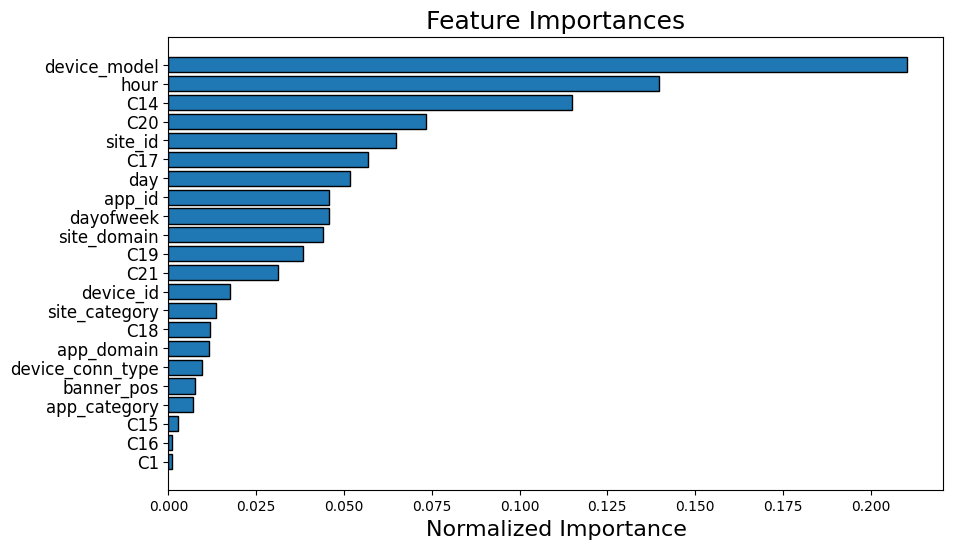

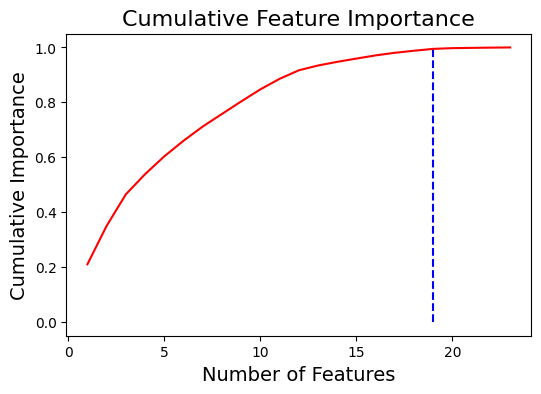

19 features required for 0.99 of cumulative importance


In [257]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 24)

In [258]:
fs.feature_importances.head(20)

,feature,importance,normalized_importance,cumulative_importance
0,device_model,6306.9,0.210230,0.210230
1,hour,4194.5,0.139817,0.350047
2,C14,3447.6,0.114920,0.464967
3,C20,2203.7,0.073457,0.538423
4,site_id,1946.9,0.064897,0.603320
5,C17,1702.3,0.056743,0.660063
6,day,1552.8,0.051760,0.711823
7,app_id,1375.5,0.045850,0.757673
8,dayofweek,1367.7,0.045590,0.803263
9,site_domain,1319.6,0.043987,0.847250


In [259]:
top_99_percentile_features = list(fs.feature_importances.loc[:17, 'feature'])
len(top_99_percentile_features)

18

In [260]:
fs.identify_low_importance(cumulative_importance = 0.99)

18 features required for cumulative importance of 0.99 after one hot encoding.
5 features do not contribute to cumulative importance of 0.99.



In [261]:
low_importance_features = fs.ops['low_importance']
low_importance_features

['app_category', 'C15', 'C16', 'C1', 'device_type']

## Modeling Before Removing Features

In [262]:
y_test.value_counts()

0    20755
1    4245 
Name: y, dtype: int64

### Logistic Regression

In [263]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [264]:
lr.fit(X_train_new,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [265]:
# Use the testing data to make predictions and determine the accuracy of your predictions.
lr.fit(X_train_new,y_train)
pred_lr = lr.predict(X_test_new)
from sklearn import metrics
print(metrics.accuracy_score(y_test, pred_lr))
acc_lr = accuracy_score(y_test, pred_lr)
recall_lr = recall_score(y_test, pred_lr)
precision_lr = precision_score(y_test, pred_lr)
f1score_lr = f1_score(y_test, pred_lr)

AUC_LR = roc_auc_score(y_test, pred_lr)

0.67828


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [266]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, lr.predict_proba(X_test_new)[:, 1])

0.701868793447816

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


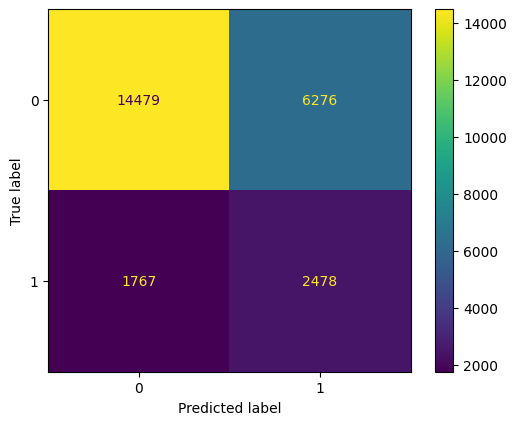

In [267]:
metrics.plot_confusion_matrix(lr, X_test_new, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


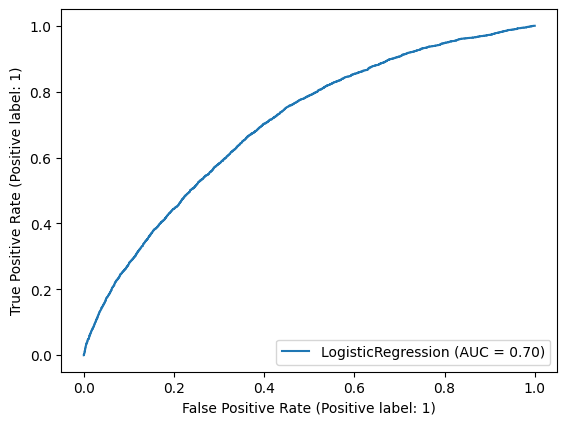

In [268]:
metrics.plot_roc_curve(lr, X_test_new, y_test) 
plt.show()

In [269]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.69      0.78     20755
           1       0.29      0.60      0.39      4245

    accuracy                           0.68     25000
   macro avg       0.59      0.65      0.58     25000
weighted avg       0.79      0.68      0.71     25000



### Random Forest

In [270]:
model_rf = RandomForestClassifier(n_estimators=10, max_features=7, random_state=42)
model_rf.fit(X_train_new, y_train)
predict_rf = model_rf.predict(X_test_new)
recall_rf = recall_score(y_test, predict_rf)
precision_rf = precision_score(y_test, predict_rf)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


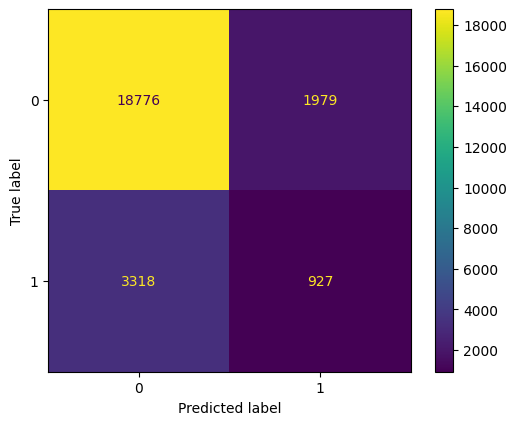

In [271]:
metrics.plot_confusion_matrix(model_rf, X_test_new, y_test)

In [272]:
AUC_RF=roc_auc_score(predict_rf,y_test)
acc_rf=accuracy_score(y_test,predict_rf)
recall_rf=recall_score(y_test,predict_rf)
precision_rf=precision_score(y_test,predict_rf)
f1score_rf=f1_score(y_test, predict_rf)

print(accuracy_score(y_test, predict_rf))
print("ROC_AUC Score:",AUC_RF)

0.78812
ROC_AUC Score: 0.5844093319347335


In [273]:
print(classification_report(y_test, predict_rf))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88     20755
           1       0.32      0.22      0.26      4245

    accuracy                           0.79     25000
   macro avg       0.58      0.56      0.57     25000
weighted avg       0.76      0.79      0.77     25000



###  XGBoost

In [274]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
XGB_fit=xgb.fit(X_train_new, y_train)
y_xgb_predict = XGB_fit.predict(X_test_new)
XGB_probability = XGB_fit.predict_proba(X_test_new)[:,1]

acc_xgb=accuracy_score(y_test,y_xgb_predict)
recall_xgb=recall_score(y_test,y_xgb_predict)
precision_xgb=precision_score(y_test,y_xgb_predict)
f1score_xgb=f1_score(y_test,y_xgb_predict)

AUC_xgb=roc_auc_score(y_xgb_predict,y_test)


print(accuracy_score(y_xgb_predict,y_test))
print("ROC_AUC Score:",AUC_xgb)

0.66344
ROC_AUC Score: 0.5861846766651491


In [275]:
print(classification_report(y_test, y_xgb_predict))

              precision    recall  f1-score   support

           0       0.89      0.67      0.77     20755
           1       0.28      0.61      0.38      4245

    accuracy                           0.66     25000
   macro avg       0.59      0.64      0.58     25000
weighted avg       0.79      0.66      0.70     25000



In [276]:
ind=['Logistic regression','Randomforest',"XGBoost"]
data={"Accuracy":[acc_lr,acc_rf,acc_xgb],"Recall":[recall_lr,recall_rf,recall_xgb],"Precision":[precision_lr,precision_rf,precision_xgb],
    'f1_score':[f1score_lr,f1score_rf,f1score_xgb],"ROC_AUC":[AUC_LR,AUC_RF,AUC_xgb]}
result=pd.DataFrame(data=data,index=ind)
result

,Accuracy,Recall,Precision,f1_score,ROC_AUC
Logistic regression,0.67828,0.583746,0.283071,0.381260,0.640680
Randomforest,0.78812,0.218375,0.318995,0.259264,0.584409
XGBoost,0.66344,0.612721,0.277558,0.382051,0.586185


## Removing Features

In [277]:
all_to_remove = fs.check_removal()
all_to_remove

Total of 5 features identified for removal


['device_type', 'C15', 'app_category', 'C16', 'C1']

In [278]:
X_train_new = X_train_new.drop(columns = all_to_remove, axis = 1 )
X_train_new.shape


(124528, 18)

In [279]:
X_test_new = X_test_new.drop(columns = all_to_remove, axis = 1 )
X_test_new.shape

(25000, 18)

### Modeling

In [280]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
%matplotlib inline

### Logistic Regression

In [281]:
lr.fit(X_train_new,y_train)
# Use the testing data to make predictions and determine the accuracy of your predictions.
pred_lr = lr.predict(X_test_new)
from sklearn import metrics
print(metrics.accuracy_score(y_test, pred_lr))
acc_lr = accuracy_score(y_test, pred_lr)
recall_lr = recall_score(y_test, pred_lr)
precision_lr = precision_score(y_test, pred_lr)
f1score_lr = f1_score(y_test, pred_lr)

AUC_LR = roc_auc_score(y_test, pred_lr)

0.6808


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [282]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, lr.predict_proba(X_test_new)[:, 1])

0.7036297042249884

In [283]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.89      0.70      0.78     20755
           1       0.29      0.59      0.39      4245

    accuracy                           0.68     25000
   macro avg       0.59      0.65      0.59     25000
weighted avg       0.79      0.68      0.72     25000



### Random Forest

In [284]:
model_rf = RandomForestClassifier(n_estimators=10, max_features=7, random_state=42)
model_rf.fit(X_train_new, y_train)
predict_rf = model_rf.predict(X_test_new)
recall_rf = recall_score(y_test, predict_rf)
precision_rf = precision_score(y_test, predict_rf)

In [285]:
AUC_RF=roc_auc_score(y_test, predict_rf)
acc_rf=accuracy_score(y_test,predict_rf)
recall_rf=recall_score(y_test,predict_rf)
precision_rf=precision_score(y_test,predict_rf)
f1score_rf=f1_score(y_test, predict_rf)

print(accuracy_score(y_test, predict_rf))
print("ROC_AUC Score:",AUC_RF)

0.78964
ROC_AUC Score: 0.5588670503566909


In [286]:
print(classification_report(y_test, predict_rf))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88     20755
           1       0.32      0.21      0.25      4245

    accuracy                           0.79     25000
   macro avg       0.58      0.56      0.57     25000
weighted avg       0.76      0.79      0.77     25000



## XGBoost

In [287]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
XGB_fit=xgb.fit(X_train_new, y_train)
y_xgb_predict = XGB_fit.predict(X_test_new)
XGB_probability = XGB_fit.predict_proba(X_test_new)[:,1]

acc_xgb=accuracy_score(y_test,y_xgb_predict)
recall_xgb=recall_score(y_test,y_xgb_predict)
precision_xgb=precision_score(y_test,y_xgb_predict)
f1score_xgb=f1_score(y_test,y_xgb_predict)

AUC_xgb=roc_auc_score(y_test, y_xgb_predict)


print(accuracy_score(y_test, y_xgb_predict))
print("ROC_AUC Score:",AUC_xgb)

0.66344
ROC_AUC Score: 0.6432671934814124


In [288]:
print(classification_report(y_test, y_xgb_predict))

              precision    recall  f1-score   support

           0       0.89      0.67      0.77     20755
           1       0.28      0.61      0.38      4245

    accuracy                           0.66     25000
   macro avg       0.59      0.64      0.58     25000
weighted avg       0.79      0.66      0.70     25000



In [289]:
ind=['Logistic regression','Randomforest',"XGBoost"]
data={"Accuracy":[acc_lr,acc_rf,acc_xgb],"Recall":[recall_lr,recall_rf,recall_xgb],"Precision":[precision_lr,precision_rf,precision_xgb],
    'f1_score':[f1score_lr,f1score_rf,f1score_xgb],"ROC_AUC":[AUC_LR,AUC_RF,AUC_xgb]}
result=pd.DataFrame(data=data,index=ind)
result

,Accuracy,Recall,Precision,f1_score,ROC_AUC
Logistic regression,0.68080,0.594582,0.287373,0.387473,0.646508
Randomforest,0.78964,0.209423,0.318410,0.252664,0.558867
XGBoost,0.66344,0.612721,0.277558,0.382051,0.643267
